# This is the Juypter Notebook containing simulations for Theorem 4 in the paper "Networked Competitive Bivirus SIS Model - Analysis of the Discrete-Time Case"

In [29]:
import bivirus
import numpy as np
import importlib
importlib.reload(bivirus)

<module 'bivirus' from '/Users/mrhoggboss/Documents/Rice/research/Discrete-time-competitive-bivirus-SIS/bivirus.py'>

In [30]:
def path_graph_adjacency(n, W = 1):
    A = np.zeros((n, n))
    for i in range(n - 1):
        A[i, i + 1] = np.random.uniform(0, W)
        A[i + 1, i] = np.random.uniform(0, W)
    return A

In [31]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, threshold=1.5, W=2, iterations=15000, tolerance=1e-6)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
A1_raw, A2_raw = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# Set all values in A below 'threshold' to zero
A1_thres = np.where(A1_raw < config.threshold, 0, A1_raw)
A2_thres = np.where(A2_raw < config.threshold, 0, A2_raw)

# add the path graph adjacency matrix to ensure strong connectivity
A1 = A1_thres + path_graph_adjacency(config.N, W=config.W/10)
A2 = A2_thres + path_graph_adjacency(config.N, W=config.W/10)

beta = [
    0.7 * np.ones(config.N),
    0.4 * np.ones(config.N)
]
B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    0.1 * np.ones(config.N),
    1 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[1.05035672 1.32023924 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.09348044
  1.1729385  0.        ]
 [0.13994178 1.25488928 0.11978092 0.         1.32887652 1.22760733
  0.         0.         1.1315009  1.39263575 0.         0.
  0.         0.         0.         1.33903502 0.         1.28040546
  0.         0.        ]
 [0.         0.10678711 0.         1.26974253 0.         0.
  0.         1.29726894 0.         0.         0.         0.
  0.         1.14132825 1.0680276  1.06939919 0.         0.
  1.05687895 0.        ]
 [0.         1.21372813 1.36631522 0.         0.07434063 1.18822824
  0.         0.         1.32667998 0.         0.         0.
  1.15304529 0.         1.39530892 0.         0.         0.
  0.         1.0640707 ]
 [0.         0.         0.         0.04176621 0.         1.31615517
  0.         0.         1.31818358 1.33929284 1.12248437 0.
  0.         

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/2562402840.py:22: RuntimeWarning: divide by zero encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/2562402840.py:22: RuntimeWarning: overflow encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/2562402840.py:22: RuntimeWarning: invalid value encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/2562402840.py:23: RuntimeWarning: divide by zero encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/2562402840.py:23: RuntimeWarning: overflow encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/2562402840.py:23: RuntimeWarning: invalid value encountered in matmul
  B2 = np.diag(beta[1]) @ A2


In [32]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.0059168078495964
spectral radius 2 is 1.0026796597001768
Theorem 2 satisfied: False
Theorem 3: 0


In [33]:
# calculate the boundary equilibria corresponding to virus 1 and virus 2
x1_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[0], delta[0], config)
x2_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[1], delta[1], config)
print("x1_bar: ", x1_bar)
print("x2_bar: ", x2_bar)

x_bar Converged at iteration 3280
x_bar Converged at iteration 4919
x1_bar:  [0.97853181 0.9891083  0.98567744 0.98853226 0.98642328 0.9799767
 0.97962549 0.98485308 0.98034749 0.98975032 0.97304601 0.96321501
 0.97154337 0.97216385 0.98327669 0.98457815 0.9798552  0.98813104
 0.97549554 0.97955061]
x2_bar:  [0.70029302 0.65886484 0.79045846 0.70874433 0.78629961 0.74565865
 0.76690293 0.72070267 0.69537597 0.73767799 0.8040394  0.3769378
 0.80008888 0.68169175 0.59075014 0.73646307 0.59409899 0.71709048
 0.69210426 0.76341949]


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x_bar Converged at iteration 3047
x1_bar is: [0.97853151 0.98910829 0.98567742 0.98853225 0.98642327 0.97997657
 0.97962534 0.98485308 0.98034743 0.98975032 0.97304424 0.96321665
 0.97154146 0.97216079 0.98327665 0.98457814 0.97985509 0.98813103
 0.97549464 0.97955046]
x_bar Converged at iteration 3047
x1_bar_avg is: 0.9806837319398755
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Main loop Converged at iteration 8485
spectral radius 1 is 1.0059168078495964
spectral radius 2 is 1.0026796597001768
x_bar Converged at iteration 3280
x_bar Converged at iteration 4919
det radius 1 is 1.0703489918915867
det radius 2 is 2.739068978682886
This experiment satisfies Theorem:  4.4
All assumptions satisfied
x_bar Converged at iteration 3047
x1_bar is: [0.97853151 

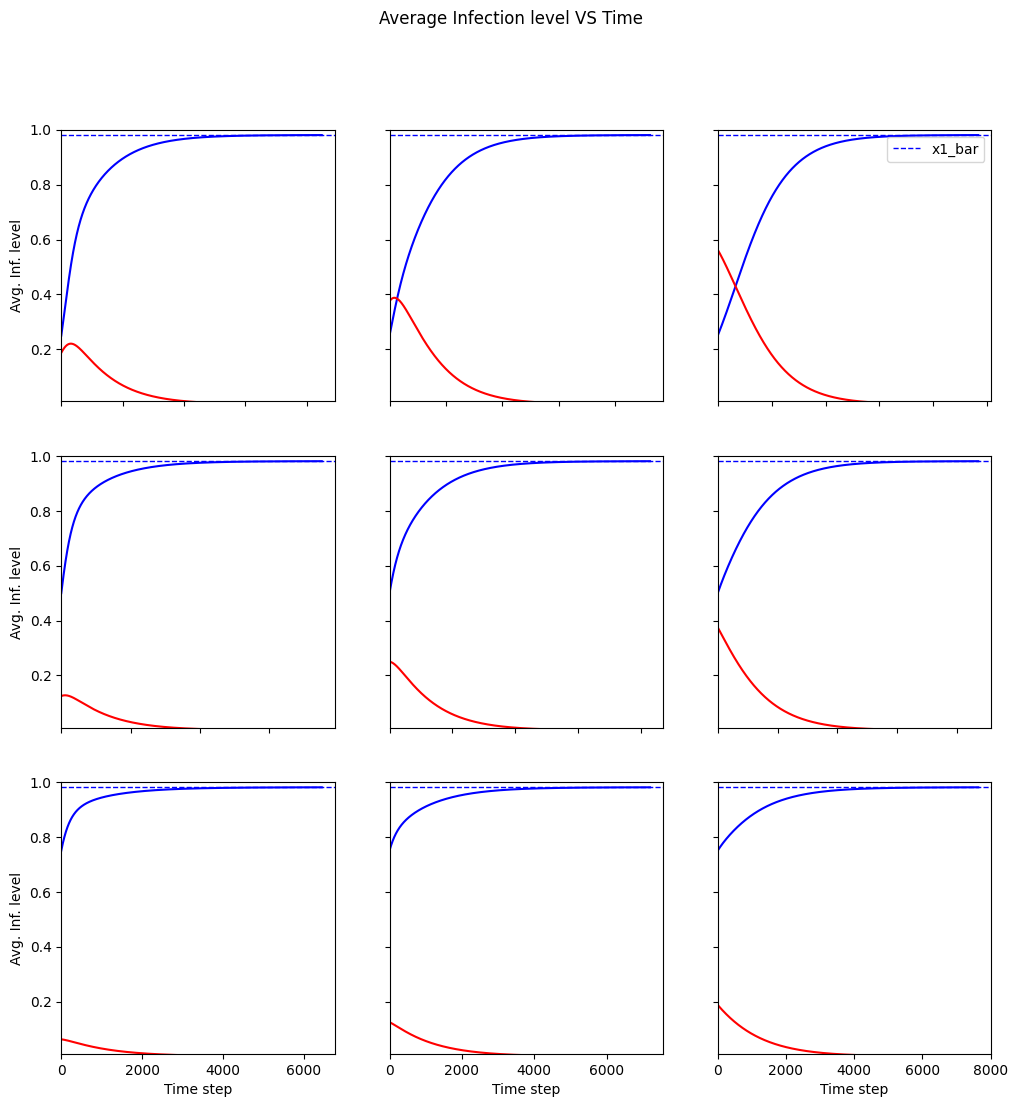

In [34]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)
        x1_bar = bivirus.x_bar(x1, B1, delta[0], config)
        print("x1_bar is:", x1_bar)
        x1_bar_avg = np.mean(bivirus.x_bar(x1, B1, delta[0], config))
        print("x1_bar_avg is:", x1_bar_avg)
        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))

        x1_histories.append(results["x1_history"])
        x2_histories.append(results["x2_history"])
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear', x1_bar_avg=x1_bar_avg)

All assumptions satisfied
Main loop Converged at iteration 8147
spectral radius 1 is 1.0059168078495964
spectral radius 2 is 1.0026796597001768
x_bar Converged at iteration 3280
x_bar Converged at iteration 4919
det radius 1 is 1.0703489918915867
det radius 2 is 2.739068978682886
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Converged at iteration 8381
spectral radius 1 is 1.0059168078495964
spectral radius 2 is 1.0026796597001768
x_bar Converged at iteration 3280
x_bar Converged at iteration 4919
det radius 1 is 1.0703489918915867
det radius 2 is 2.739068978682886
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Converged at iteration 8580
spectral radius 1 is 1.0059168078495964
spectral radius 2 is 1.0026796597001768
x_bar Converged at iteration 3280
x_bar Converged at iteration 4919
det radius 1 is 1.0703489918915867
det radius 2 is 2.739068978682886
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop C

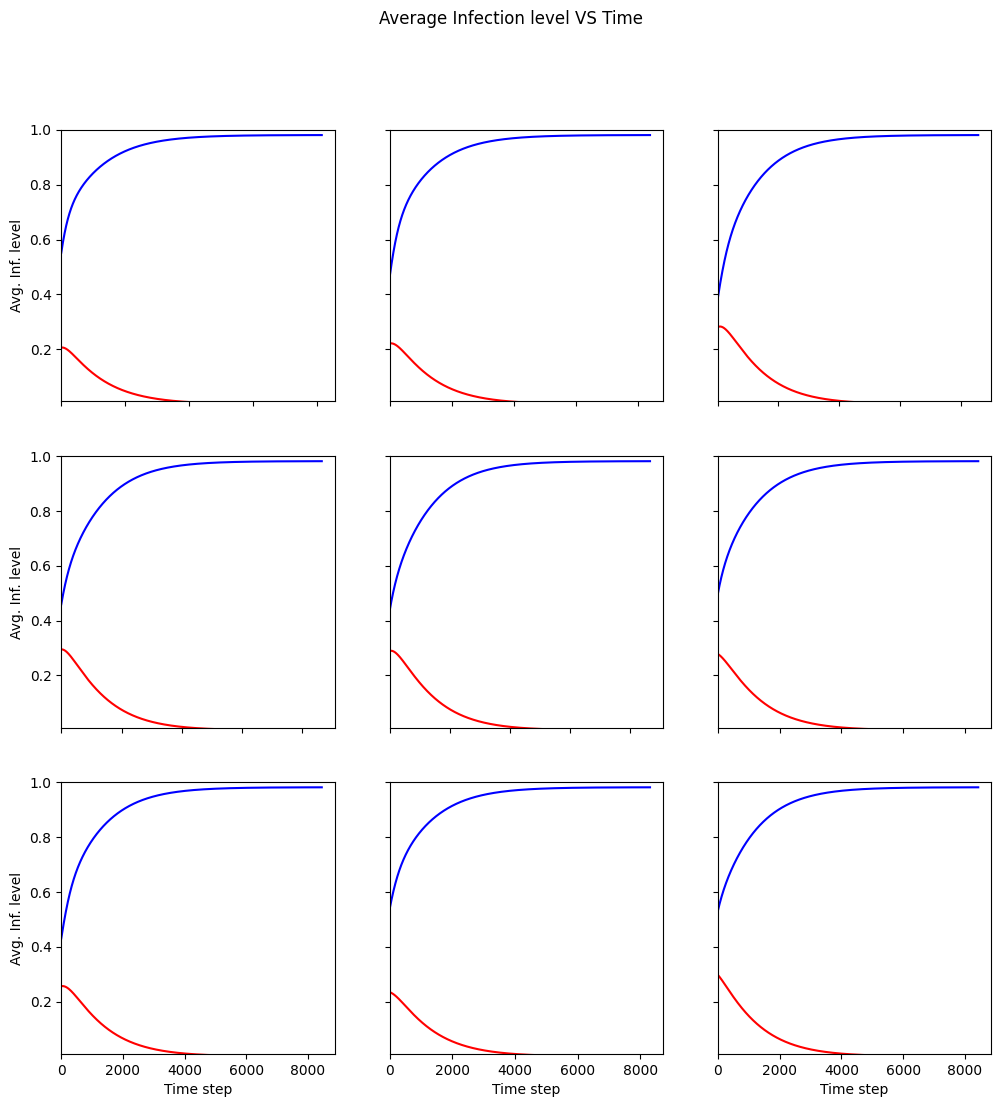

In [35]:
# Completely random initializations
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

The Following Simluations demonstrates the unstability of the endemic equilibria $(\bar{x}^1, 0)$ when  
$\rho(I - hD^2 + (I - \bar{X}^1)B^2) > 1$

In [36]:
# configurations of the experiment
config = bivirus.SimulationConfig(N=20, h=0.001, W=0.5, iterations=10000, tolerance=1e-4)

# random seed for reproducibility
seed = 1049
np.random.seed(seed)

# parameters of the model
B1, B2 = np.random.uniform(0, config.W, (config.N, config.N)), np.random.uniform(0, config.W, (config.N, config.N))
# B1, B2 = np.round(B1, 2), np.round(B2, 2)

B = [B1, B2]
delta = [
    1 * np.ones(config.N),
    1 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[0.3751274  0.42252373 0.20128587 0.17467228 0.32160502 0.08289713
  0.22224124 0.06756518 0.19099649 0.2738589  0.21188745 0.03612253
  0.03872828 0.27130289 0.15989252 0.35146187 0.25771809 0.39052873
  0.41890661 0.25899246]
 [0.24073376 0.44817474 0.03490557 0.10983307 0.47459876 0.43843119
  0.14193125 0.07331393 0.40410746 0.49736991 0.08433846 0.01124724
  0.04606262 0.07932609 0.22876339 0.47822679 0.0525655  0.45728766
  0.31777189 0.28542781]
 [0.24931478 0.29186982 0.27453013 0.45215412 0.31699776 0.35671279
  0.0813211  0.46331034 0.27509277 0.24552886 0.35944465 0.2204415
  0.05691065 0.40761723 0.38143843 0.38192828 0.22535924 0.2745854
  0.37745677 0.31549729]
 [0.0055188  0.43347433 0.44484959 0.06040182 0.35386909 0.42436723
  0.09863665 0.24996231 0.47381428 0.13630889 0.18596879 0.36269028
  0.41180189 0.27984381 0.49832461 0.06215164 0.16392833 0.10033629
  0.28820013 0.38002525]
 [0.23260674 0.24566719 0.09222087 0.32960125 0.02445267 0.46249622
  0.1665684

In [37]:
# check assumptions of the theorems 2 and 3
print("Assumptions of theorems:")
print("Theorem 2 satisfied:", bivirus.check_theorem_2(B, delta, config))
print("Theorem 3:", bivirus.check_theorem_3(B, delta, config))

Assumptions of theorems:
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
Theorem 2 satisfied: False
Theorem 3: 0


The two code blocks below represent two different initialization strategies for the same model(i.e., same network, same parameters)

All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875
 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875 0.1875]
Main loop Converged at iteration 1065
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1791
x_bar Converged at iteration 1751
det radius 1 is 2.0555204904488225
det radius 2 is 2.0196797645932416
This experiment satisfies Theorem:  4.4
All assumptions satisfied
x1 is [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
 0.25 0.25 0.25 0.25 0.25 0.25]
x2 is [0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375
 0.375 0.375 0.375 0.375 0.375 0.375 0.375 0.375]
Main loop Converged at iteration 874
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1791
x_bar C

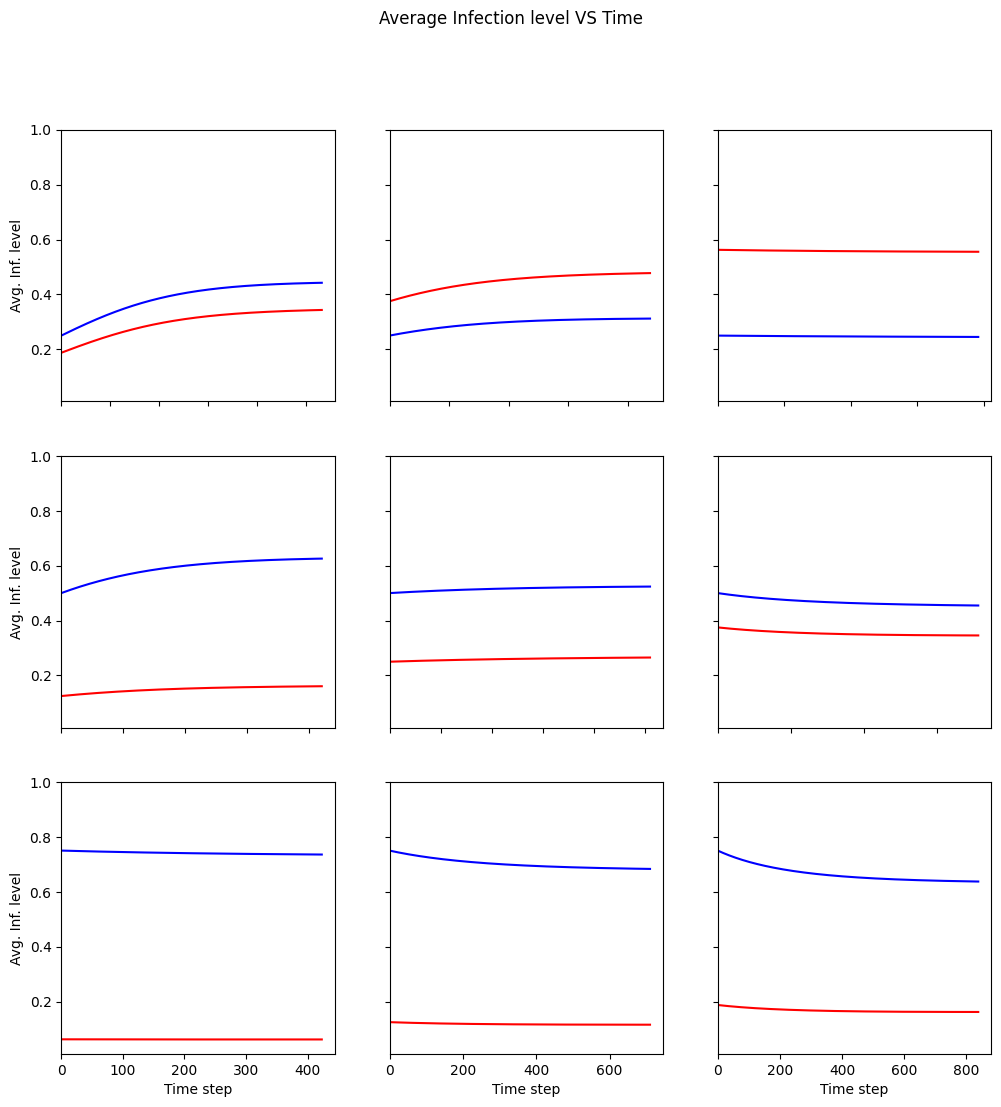

In [38]:
# initialization logic to test starting states covering "a large portion of \mathcal D"
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

x1 = np.zeros(config.N)
x2 = np.zeros(config.N)
for num1 in [0.25, 0.50, 0.75]:
    num2bound = 1 - num1
    num2list = [num2bound * (i + 1) / 4 for i in range(3)]
    for num2 in num2list:

        x1.fill(num1)
        x2.fill(num2)
        bivirus.check_basic_assumptions(x1, x2, B, delta, config)

        print('x1 is '+str(x1))
        print('x2 is ' + str(x2))
        results = bivirus.run_simulation(x1, x2, B, delta, config)
        print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))

        x1_histories.append(results["x1_history"])
        x2_histories.append(results["x2_history"])
        x1_avg_histories.append(results["x1_avg_history"])
        x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

All assumptions satisfied
Main loop Converged at iteration 2169
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1791
x_bar Converged at iteration 1751
det radius 1 is 2.0555204904488225
det radius 2 is 2.0196797645932416
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Converged at iteration 2112
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1791
x_bar Converged at iteration 1751
det radius 1 is 2.0555204904488225
det radius 2 is 2.0196797645932416
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop Converged at iteration 2168
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1791
x_bar Converged at iteration 1751
det radius 1 is 2.0555204904488225
det radius 2 is 2.0196797645932416
This experiment satisfies Theorem:  4.4
All assumptions satisfied
Main loop C

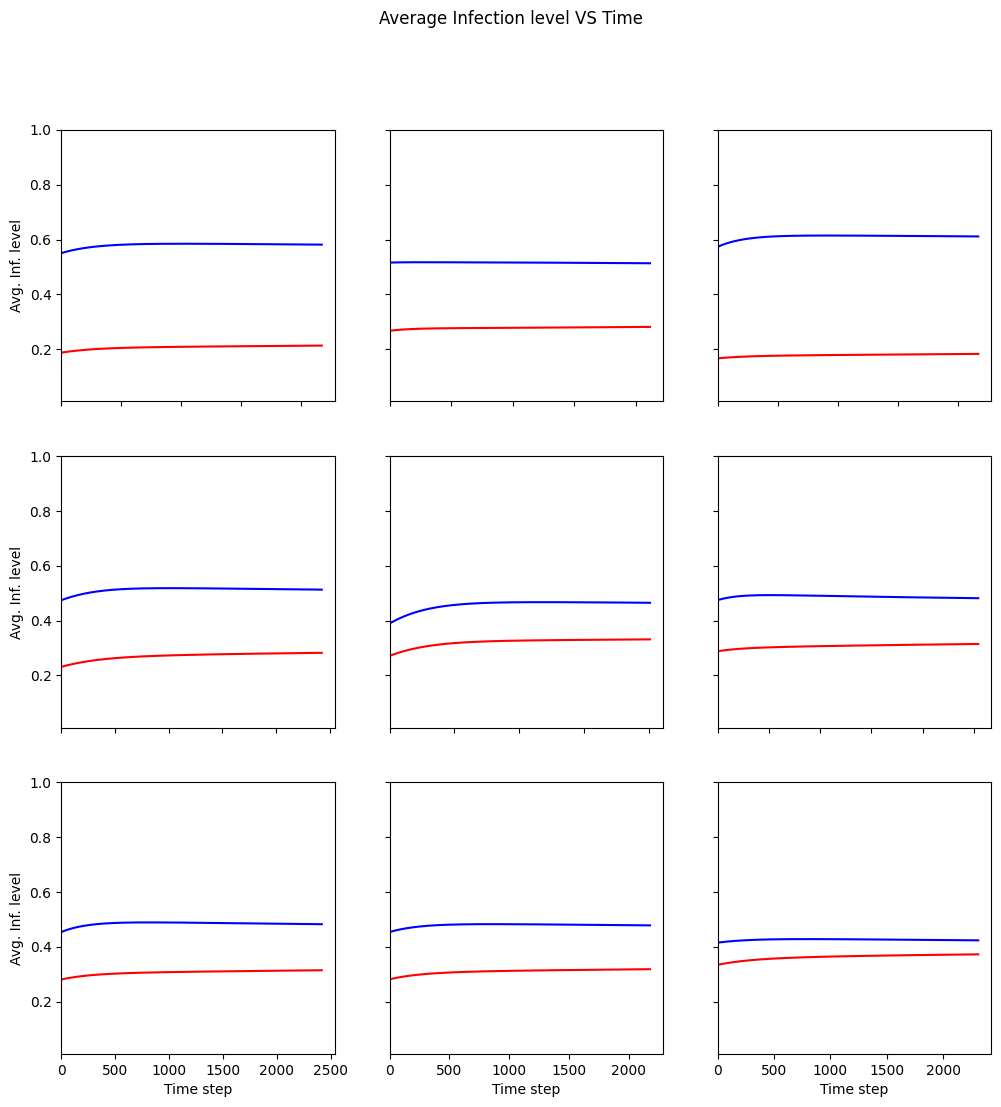

In [39]:
# Completely random initializations
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

for i in range(9):
    x1 = np.random.uniform(0, 1, config.N)
    x2 = np.random.uniform(0, 1 - x1, config.N)
    bivirus.check_basic_assumptions(x1, x2, B, delta, config)
    results = bivirus.run_simulation(x1, x2, B, delta, config)
    print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))
    x1_histories.append(results["x1_history"])
    x2_histories.append(results["x2_history"])
    x1_avg_histories.append(results["x1_avg_history"])
    x2_avg_histories.append(results["x2_avg_history"])
bivirus.plot_simulation_3by3(x1_avg_histories, x2_avg_histories, yscale='linear')

All assumptions satisfied


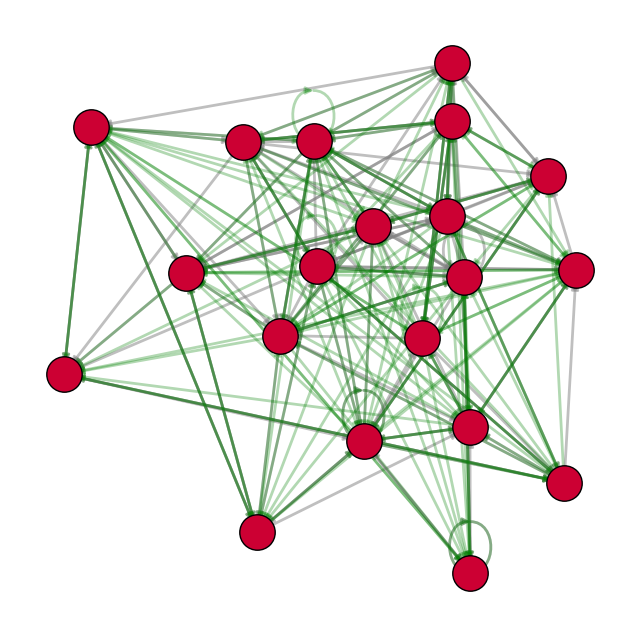

Main loop Converged at iteration 1085
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1791
x_bar Converged at iteration 1751
det radius 1 is 2.0555204904488225
det radius 2 is 2.0196797645932416
This experiment satisfies Theorem:  4.4


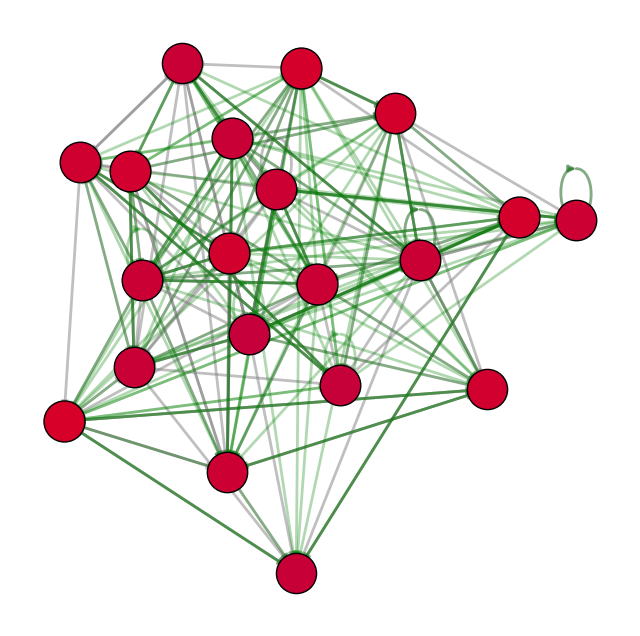

All assumptions satisfied
Main loop Converged at iteration 975
spectral radius 1 is 1.0038785417181626
spectral radius 2 is 1.003973378971474
x_bar Converged at iteration 1791
x_bar Converged at iteration 1751
det radius 1 is 2.0555204904488225
det radius 2 is 2.0196797645932416
This experiment satisfies Theorem:  4.4


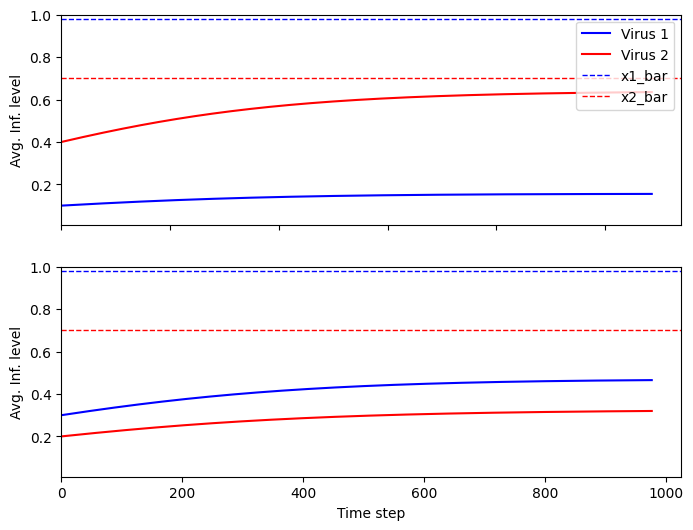

In [40]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []
import networkx as nx

B1 = nx.from_numpy_array(B[0], create_using=nx.DiGraph) 
B2 = nx.from_numpy_array(B[1], create_using=nx.DiGraph)
default_pos = nx.spring_layout(B1)

x1 = 0.1 * np.ones(config.N)
x2 = 0.4 * np.ones(config.N)
bivirus.check_basic_assumptions(x1, x2, B, delta, config)
# bivirus.plot_two_networks_piechart_nodes(B1, B2, x1, x2, pos1=default_pos, pos2=default_pos)
bivirus.plot_bivirus_graph(A1, A2, x1, x2)

results = bivirus.run_simulation(x1, x2, B, delta, config)
print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))
x1_histories.append(results["x1_history"])
x2_histories.append(results["x2_history"])
x1_avg_histories.append(results["x1_avg_history"])
x2_avg_histories.append(results["x2_avg_history"])    
# bivirus.plot_two_networks_piechart_nodes(B1, B2, results["x1_history"][-1], results["x2_history"][-1], pos1=default_pos, pos2=default_pos)
bivirus.plot_bivirus_graph(A1, A2, results["x1_history"][-1], results["x2_history"][-1])

x1 = 0.3 * np.ones(config.N)
x2 = 0.2 * np.ones(config.N)
bivirus.check_basic_assumptions(x1, x2, B, delta, config)
results = bivirus.run_simulation(x1, x2, B, delta, config)
print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))
x1_histories.append(results["x1_history"])
x2_histories.append(results["x2_history"])
x1_avg_histories.append(results["x1_avg_history"])
x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), x2_bar_avg=np.mean(x2_bar), yscale='linear')

The Following Simluations demonstrates the asymtotic stability of the endemic equilibria $(\bar{x}^1, 0)$ when  
$\rho(I - hD^2 + (I - \bar{X}^1)B^2) \leq 1$

In [41]:
beta = [
    0.17587294 * np.ones(config.N),
    0.76483412 * np.ones(config.N)
]

B1 = np.diag(beta[0]) @ A1
B2 = np.diag(beta[1]) @ A2
B = [B1, B2]
delta = [
    1.45926338 * np.ones(config.N),
    0.00074411 * np.ones(config.N)
]
print("B1 is:", B1)
print()
print("B2 is:", B2)

B1 is: [[0.26389904 0.33170622 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.27473374
  0.29469735 0.        ]
 [0.03515996 0.31528724 0.0300946  0.         0.33387631 0.30843273
  0.         0.         0.28428627 0.34989563 0.         0.
  0.         0.         0.         0.33642861 0.         0.3216981
  0.         0.        ]
 [0.         0.02682995 0.         0.31901908 0.         0.
  0.         0.325935   0.         0.         0.         0.
  0.         0.28675536 0.26833879 0.2686834  0.         0.
  0.26553773 0.        ]
 [0.         0.30494562 0.34328268 0.         0.01867787 0.29853885
  0.         0.         0.33332444 0.         0.         0.
  0.28969924 0.         0.35056726 0.         0.         0.
  0.         0.26734463]
 [0.         0.         0.         0.01049364 0.         0.33068011
  0.         0.         0.33118975 0.33649339 0.28202089 0.
  0.         0

/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/1192841755.py:6: RuntimeWarning: divide by zero encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/1192841755.py:6: RuntimeWarning: overflow encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/1192841755.py:6: RuntimeWarning: invalid value encountered in matmul
  B1 = np.diag(beta[0]) @ A1
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/1192841755.py:7: RuntimeWarning: divide by zero encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/1192841755.py:7: RuntimeWarning: overflow encountered in matmul
  B2 = np.diag(beta[1]) @ A2
/var/folders/rd/xhnyglx96275scj4rd4lkvrr0000gn/T/ipykernel_80736/1192841755.py:7: RuntimeWarning: invalid value encountered in matmul
  B2 = np.diag(beta[1]) @ A2


x_bar Converged at iteration 527
x_bar Converged at iteration 2031
All assumptions satisfied


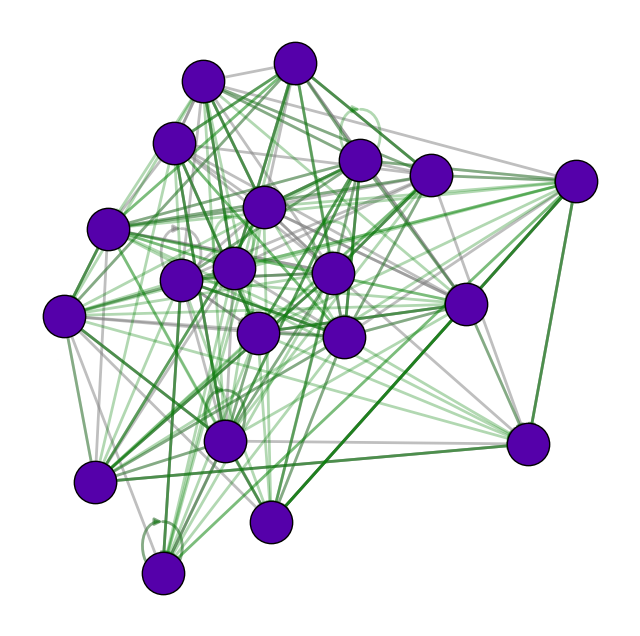

Main loop Converged at iteration 3060
spectral radius 1 is 1.0000524418856063
spectral radius 2 is 1.0070350791117093
x_bar Converged at iteration 527
x_bar Converged at iteration 2031
det radius 1 is 7.377628170531875
det radius 2 is 0.9992070434192648
This experiment satisfies Theorem:  4.3


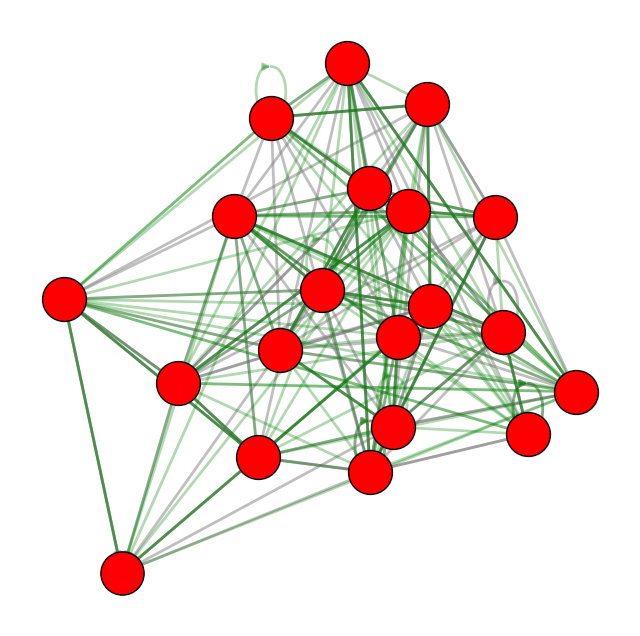

All assumptions satisfied
Main loop Converged at iteration 1959
spectral radius 1 is 1.0000524418856063
spectral radius 2 is 1.0070350791117093
x_bar Converged at iteration 527
x_bar Converged at iteration 2031
det radius 1 is 7.377628170531875
det radius 2 is 0.9992070434192648
This experiment satisfies Theorem:  4.3


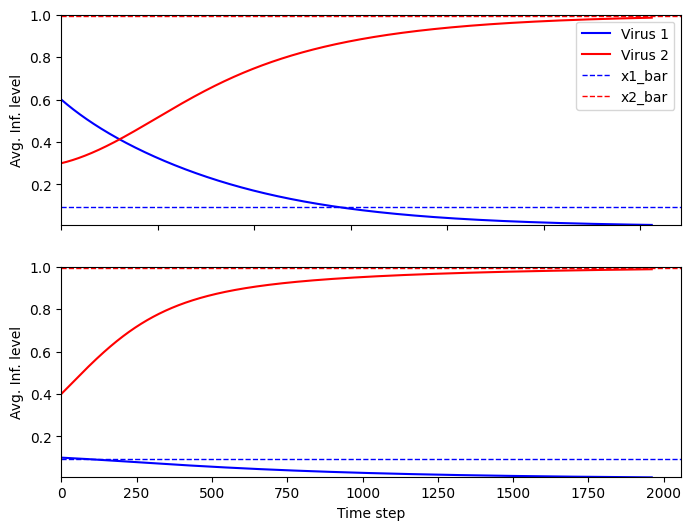

In [42]:
x1_histories = []
x2_histories = []
x1_avg_histories = []
x2_avg_histories = []

B1 = nx.from_numpy_array(B[0], create_using=nx.DiGraph) 
B2 = nx.from_numpy_array(B[1], create_using=nx.DiGraph)
default_pos = nx.spring_layout(B1)

x1_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[0], delta[0], config)
x2_bar = bivirus.x_bar(0.1 * np.ones(config.N), B[1], delta[1], config)

x1 = 0.6 * np.ones(config.N)
x2 = 0.3 * np.ones(config.N)
bivirus.check_basic_assumptions(x1, x2, B, delta, config)
# bivirus.plot_two_networks_piechart_nodes(B1, B2, x1, x2, pos1=default_pos, pos2=default_pos)
bivirus.plot_bivirus_graph(A1, A2, x1, x2)

results = bivirus.run_simulation(x1, x2, B, delta, config)
print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))
x1_histories.append(results["x1_history"])
x2_histories.append(results["x2_history"])
x1_avg_histories.append(results["x1_avg_history"])
x2_avg_histories.append(results["x2_avg_history"])
# bivirus.plot_two_networks_piechart_nodes(B1, B2, results["x1_history"][-1], results["x2_history"][-1], pos1=default_pos, pos2=default_pos)
bivirus.plot_bivirus_graph(A1, A2, results["x1_history"][-1], results["x2_history"][-1])

x1 = 0.1 * np.ones(config.N)
x2 = 0.4 * np.ones(config.N)
bivirus.check_basic_assumptions(x1, x2, B, delta, config)
results = bivirus.run_simulation(x1, x2, B, delta, config)
print("This experiment satisfies Theorem: ", bivirus.check_theorem_4(B, delta, config))
x1_histories.append(results["x1_history"])
x2_histories.append(results["x2_history"])
x1_avg_histories.append(results["x1_avg_history"])
x2_avg_histories.append(results["x2_avg_history"])

bivirus.plot_simulation_1by2(x1_avg_histories, x2_avg_histories, x1_bar_avg=np.mean(x1_bar), x2_bar_avg=np.mean(x2_bar), yscale='linear')